-->initialization-->exploration-->rewards-->updating-->transition--->

### Functions and Packages

In [3]:
import numpy as np
np.set_printoptions(precision = 4, suppress = True)


In [4]:
def initialize_qtable(N, num_actions, feedback):
    if feedback == 1:
        Q = np.random.uniform(0,1,(N, num_actions,num_actions))
    else:
        Q = np.random.uniform(0,1,(N, num_actions))   
        #Q = np.zeros((N, num_actions))   
    return Q

In [5]:
N = 2
num_actions = 6
feedback = 0
Q = initialize_qtable(N, num_actions, feedback)
Q

array([[0.7035, 0.6918, 0.6024, 0.2576, 0.5412, 0.9727],
       [0.5269, 0.9413, 0.086 , 0.0619, 0.2774, 0.7348]])

In [6]:
N = 2
num_actions = 6
feedback = 1
Q = initialize_qtable(N, num_actions, feedback)
Q

array([[[0.076 , 0.9694, 0.0233, 0.4818, 0.055 , 0.4915],
        [0.4455, 0.9666, 0.8147, 0.3697, 0.6292, 0.1396],
        [0.6377, 0.9283, 0.8861, 0.6024, 0.784 , 0.6384],
        [0.0162, 0.9055, 0.7219, 0.7433, 0.6285, 0.8428],
        [0.0382, 0.8637, 0.0466, 0.9525, 0.2435, 0.2408],
        [0.9148, 0.7413, 0.1421, 0.8367, 0.0884, 0.936 ]],

       [[0.6231, 0.2575, 0.3311, 0.7845, 0.7575, 0.5576],
        [0.2004, 0.9299, 0.8988, 0.2832, 0.3521, 0.4889],
        [0.4404, 0.3906, 0.5208, 0.9315, 0.9179, 0.4018],
        [0.7385, 0.2957, 0.8755, 0.3858, 0.539 , 0.0188],
        [0.4165, 0.5998, 0.1172, 0.9348, 0.4425, 0.6577],
        [0.7874, 0.4477, 0.4031, 0.7826, 0.6677, 0.9786]]])

In [7]:
def exploratory_strategy(Q, N, egreedy, num_actions,past_win,winning_bid,eps,beta):
    # Input: Master Q table, agent index, past winning action
    # Output: actions taken by all agents
    actions = np.ones(N,dtype=int)
    for agent_idx in range(N):
        if egreedy == 1:
            if past_win == 1:
                if np.random.uniform()>eps:
                    actions[agent_idx] = np.argmax(Q[agent_idx,winning_bid])
                else:
                    actions[agent_idx] = np.random.choice(range(num_actions))
            else:
                if np.random.uniform()>eps:
                    actions[agent_idx] = np.argmax(Q[agent_idx])
                else:
                    actions[agent_idx] = np.random.choice(range(num_actions))
        else: 
            if past_win == 1:
                max_Q = np.max(Q[agent_idx,winning_bid])
                logits = (Q[agent_idx,winning_bid] - max_Q) / beta
                exp_logits = np.exp(logits)
                probs = exp_logits / np.sum(exp_logits)
                actions[agent_idx] = np.random.choice(range(len(probs)), p=probs)
            else:
                max_Q = np.max(Q[agent_idx])
                logits = (Q[agent_idx] - max_Q) / beta
                exp_logits = np.exp(logits)
                probs = exp_logits / np.sum(exp_logits)
                actions[agent_idx] = np.random.choice(range(len(probs)), p=probs)    
    return actions

In [8]:
egreedy = 1
past_win = 0
winning_bid = 0
eps = 0.99
beta = 0.99
actions = exploratory_strategy(Q, N, egreedy, num_actions,past_win,winning_bid,eps,beta)
actions

array([1, 3])

In [9]:
egreedy = 0
beta = 4.0
actions = exploratory_strategy(Q, N, egreedy, num_actions,past_win,winning_bid,eps,beta)
print(Q)
actions

ValueError: 'p' must be 1-dimensional

In [10]:
def actions2rewards(actions, valuations, design, action2bid, method=0):
    # compute winners and winning payments
    bids = action2bid[actions]
    unique_values_sorted = np.sort(np.unique(bids))[::-1]
    first_highest_value = unique_values_sorted[0]
    if len(unique_values_sorted) > 1:
        second_highest_value = unique_values_sorted[1]
    else:
        second_highest_value = first_highest_value
    winners_payment = design * first_highest_value + (1-design) * second_highest_value
    winners_idx = np.where(bids == first_highest_value)[0]
    # compute reward vector
    if method==0:
        winner_idx = np.random.choice(winners_idx)
        rewards = bids * 0.0
        rewards[winner_idx] = valuations[winner_idx] - winners_payment
    else:
        winning_bid_idx = np.where(bids==first_highest_value,1,0)
        no_of_winners = np.sum(winning_bid_idx)
        rewards = (1/no_of_winners) * (valuations - winners_payment) * winning_bid_idx 
    return rewards

In [11]:
valuations = np.array([1,1])
design = 1
common_valuation = 1
action2bid = np.linspace(0,common_valuation,num_actions)
print('bids',action2bid[actions])
rewards = actions2rewards(actions, valuations, design, action2bid, method=0)
print('rewards',rewards)

bids [0.2 0.6]
rewards [0.  0.4]


In [12]:
def counterfactual_reward(agent_idx,actions,valuations,design,num_actions,action2bid):
    action_copy = actions.copy()
    cf_rewards = np.zeros(num_actions)
    for agent_action in range(num_actions):
        action_copy[agent_idx] = agent_action
        cf_rewards[agent_action] = actions2rewards(action_copy,valuations,design,action2bid,method=1)[agent_idx]
    return np.array(cf_rewards)

In [13]:
actions

array([1, 3])

In [14]:
counterfactual_reward(0,actions,valuations,design,num_actions,action2bid)

array([0. , 0. , 0. , 0.2, 0.2, 0. ])

In [15]:
bids = np.array([0.2,0.2,0.2,0.2])
bids2rewards(bids,np.array([1,1,1,1]),0)

NameError: name 'bids2rewards' is not defined

In [16]:
np.partition(bids.flatten(), -2)[-2]

0.2

In [17]:
def update_qvalues(rewards, actions, Q, feedback, asynchronous, winning_bid, alpha, gamma, valuations,design,action2bid):
    N = Q.shape[0]
    num_actions = Q.shape[1]
    for agent_idx in range(N):
        action = actions[agent_idx]
        reward = rewards[agent_idx]
        if asynchronous == 1:
            if feedback == 1:
                Q[agent_idx,winning_bid,action] =  (1-alpha)*Q[agent_idx,winning_bid,action] + alpha * (reward + gamma * np.max(Q[agent_idx,winning_bid]))
            else:
                Q[agent_idx,action] =  (1-alpha)*Q[agent_idx,action] + alpha * (reward + gamma * np.max(Q[agent_idx]))
        else: 
            reward_vec = counterfactual_reward(agent_idx,actions,valuations,design,num_actions,action2bid)
            if feedback == 1:
                Q[agent_idx,winning_bid,:] =  (1-alpha)*Q[agent_idx,winning_bid,:] + alpha * (reward_vec + gamma * np.max(Q[agent_idx,winning_bid]))
            else:
                Q[agent_idx] =  (1-alpha)*Q[agent_idx] + alpha * (reward_vec + gamma * np.max(Q[agent_idx]))
    return Q

In [18]:
alpha = 0.1
gamma = 0.0
asynchronous = 0

Q_old = Q.copy()
Q_new = update_qvalues(rewards, actions, Q, feedback, asynchronous, winning_bid, alpha, gamma, valuations,design,action2bid)

print(Q_old)
print(counterfactual_reward(0,actions,valuations,design,num_actions,action2bid))
print(counterfactual_reward(1,actions,valuations,design,num_actions,action2bid))
print(Q_new)

[[[0.076  0.9694 0.0233 0.4818 0.055  0.4915]
  [0.4455 0.9666 0.8147 0.3697 0.6292 0.1396]
  [0.6377 0.9283 0.8861 0.6024 0.784  0.6384]
  [0.0162 0.9055 0.7219 0.7433 0.6285 0.8428]
  [0.0382 0.8637 0.0466 0.9525 0.2435 0.2408]
  [0.9148 0.7413 0.1421 0.8367 0.0884 0.936 ]]

 [[0.6231 0.2575 0.3311 0.7845 0.7575 0.5576]
  [0.2004 0.9299 0.8988 0.2832 0.3521 0.4889]
  [0.4404 0.3906 0.5208 0.9315 0.9179 0.4018]
  [0.7385 0.2957 0.8755 0.3858 0.539  0.0188]
  [0.4165 0.5998 0.1172 0.9348 0.4425 0.6577]
  [0.7874 0.4477 0.4031 0.7826 0.6677 0.9786]]]
[0.  0.  0.  0.2 0.2 0. ]
[0.  0.4 0.6 0.4 0.2 0. ]
[[[0.0684 0.8724 0.021  0.4536 0.0695 0.4423]
  [0.4455 0.9666 0.8147 0.3697 0.6292 0.1396]
  [0.6377 0.9283 0.8861 0.6024 0.784  0.6384]
  [0.0162 0.9055 0.7219 0.7433 0.6285 0.8428]
  [0.0382 0.8637 0.0466 0.9525 0.2435 0.2408]
  [0.9148 0.7413 0.1421 0.8367 0.0884 0.936 ]]

 [[0.5608 0.2717 0.3579 0.7461 0.7018 0.5019]
  [0.2004 0.9299 0.8988 0.2832 0.3521 0.4889]
  [0.4404 0.3906 0.520

In [44]:
def experiment(N,alpha,gamma,egreedy,asynchronous,design,feedback,num_actions,decay,verbose=2):
    Q = initialize_qtable(N, num_actions,feedback)
    common_valuation = 1
    valuations = np.ones(N)*common_valuation
    action2bid = np.linspace(0,common_valuation,num_actions)
    initial_eps = 1.0
    eps_decay = decay
    min_eps = 0.01
    eps = initial_eps
    initial_beta = 1.0
    beta_decay = decay
    min_beta = 0.01
    beta = initial_beta
    winning_bid_history = []
    num_episodes = 250000
    winning_action = 0
    
    print('Bidders:',N)
    print('Learning rate:',alpha)
    print('Discount factor:',gamma)
    print('eGreedy',egreedy)
    print('Asynchronous',asynchronous)
    print('First price:',design)
    print('Feedback:',feedback)
    print('Bid space:',action2bid)
    print('Q-table shape:',Q.shape)
    print('Epsilon: initial, final and decay rate', initial_eps, min_eps, eps_decay)
    print('Beta: initial, final and decay rate', initial_beta, min_beta, beta_decay)
    print('Num episodes:', num_episodes)

    # training loop
    for episode in range(num_episodes):
        
        # act from exploratory strategy
        actions = exploratory_strategy(Q, N, egreedy, num_actions,feedback,winning_action,eps,beta) 

        # collect rewards
        rewards = actions2rewards(actions,valuations,design,action2bid)
        
        # update Q-values
        Q = update_qvalues(rewards, actions, Q, feedback, asynchronous, winning_action, alpha, gamma, valuations,design,action2bid)

        # update exploration params
        eps = max(min_eps, eps * eps_decay)
        beta = max(min_beta, beta * beta_decay)

        # winning bid and action
        bids = actions*common_valuation/(num_actions-1)
        winning_bid = np.max(bids)
        winning_action = np.max(actions)

        # store history
        winning_bid_history.append(winning_bid)
        
        if (verbose==1) & (episode%10000==0) & (episode>0):
            print(episode,np.round(eps,2),np.round(beta,2),np.round(np.mean(winning_bid_history[-1000:]),2),np.round(np.std(winning_bid_history[-1000:]),2))

        if (verbose==2) & (episode%10000==0) & (episode>0):
            print('\nEpisode:',episode,np.round(eps,3))
            print('Bids:',action2bid[actions],', Rewards:',rewards)
            #print(winning_bid_history[-20:])
            print('Agent 0:',Q[0,:])
            #print('Agent 0 Cf reward', counterfactual_reward(0,actions,valuations,design,num_actions,action2bid))
            print('Agent 1:',Q[1,:])
            #print('Agent 1 Cf reward', counterfactual_reward(1,actions,valuations,design,num_actions,action2bid))
            print('Stdev of last 10000 bids:',np.std(winning_bid_history[-10000:]))
            print('Avg of last 10000 bids:',np.mean(winning_bid_history[-10000:]))
            
        if (episode%10000==0) & (eps==min_eps or beta==min_beta) & (np.std(winning_bid_history[-1000:])<0.001):
            break

    Y = np.mean(winning_bid_history[-1000:])
    Y_std = np.std(winning_bid_history[-1000:])
    Y_min = np.min(winning_bid_history[-1000:])
    Y_max = np.max(winning_bid_history[-1000:])
    return (Y,episode,Y_std,Y_min,Y_max,N,alpha,gamma,egreedy,asynchronous,design,feedback,num_actions,decay,Q)


### Test Cases

In [34]:
params = {'N': 2, 'alpha': 0.1, 'gamma': 0.99, 'egreedy': 0, 'design': 1, 
          'asynchronous': 1, 'feedback': 1, 'num_actions': 11, 'decay':0.99999, 'verbose':1}
experiment(**params)

Bidders: 2
Learning rate: 0.1
Discount factor: 0.99
eGreedy 0
Asynchronous 1
First price: 1
Feedback: 1
Bid space: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Q-table shape: (2, 11, 11)
Epsilon: initial, final and decay rate 1.0 0.01 0.99999
Beta: initial, final and decay rate 1.0 0.01 0.99999
Num episodes: 250000
10000 0.9 0.9 0.68 0.24
20000 0.82 0.82 0.66 0.24
30000 0.74 0.74 0.67 0.24
40000 0.67 0.67 0.66 0.24
50000 0.61 0.61 0.65 0.24
60000 0.55 0.55 0.66 0.23
70000 0.5 0.5 0.65 0.22
80000 0.45 0.45 0.66 0.22
90000 0.41 0.41 0.66 0.22
100000 0.37 0.37 0.66 0.22
110000 0.33 0.33 0.65 0.21
120000 0.3 0.3 0.65 0.21
130000 0.27 0.27 0.68 0.2
140000 0.25 0.25 0.67 0.21
150000 0.22 0.22 0.67 0.2
160000 0.2 0.2 0.67 0.2
170000 0.18 0.18 0.67 0.2
180000 0.17 0.17 0.66 0.2
190000 0.15 0.15 0.67 0.18
200000 0.14 0.14 0.68 0.19
210000 0.12 0.12 0.68 0.18
220000 0.11 0.11 0.67 0.18
230000 0.1 0.1 0.69 0.17
240000 0.09 0.09 0.68 0.18


(0.6981000000000002,
 249999,
 0.17800671335654733,
 2,
 0.1,
 0.99,
 0,
 1,
 1,
 1,
 11,
 0.99999,
 array([[[ 1.8781,  1.9152,  2.3862,  2.0092,  2.0329,  3.2467,  3.9797,
           6.2987,  1.9427,  1.2411,  1.9557],
         [ 5.8439,  3.1173,  3.6664,  5.2893,  7.7842,  9.0569,  9.0476,
          10.8827,  6.9729,  5.3673,  4.1656],
         [ 8.9381, 10.0046,  8.0939, 12.7982, 13.6399, 14.394 , 14.4121,
          14.4611, 14.4877, 10.4696,  8.1513],
         [14.933 , 17.8455, 17.8049, 17.8151, 17.8179, 17.9237, 17.9333,
          18.0548, 18.0787, 17.9556, 11.6644],
         [22.0738, 23.8008, 23.7905, 23.961 , 22.8689, 23.9655, 23.9193,
          23.8688, 23.9248, 23.8846, 15.046 ],
         [24.5903, 24.6052, 24.6804, 24.8682, 24.6544, 24.7177, 24.6787,
          24.7687, 24.7035, 24.6486, 19.6925],
         [23.8064, 23.8124, 23.8792, 23.8472, 23.9289, 23.8824, 23.9471,
          23.9474, 23.8974, 23.8589, 23.7913],
         [23.6022, 23.7093, 23.623 , 23.6027, 23.6304, 23.61

### Random Sampling

In [ ]:
import random

parameters = {'N':[2,4],
              'alpha':[0.01,0.1],
              'gamma':[0.0,0.95],
              'egreedy':[0,1],
              'design':[0,1],
              'asynchronous':[0,1],
              'feedback':[0,1],
              'num_actions':[6,11],
              'decay':[0.9999,0.99995],
              'verbose':[1]
             }

K = 500 # Number of times to sample
data = []
for _ in range(K):
    sampled_params = {}
    for key, value in parameters.items():
        if isinstance(value, list):
            sampled_params[key] = random.choice(value)
        else:
            sampled_params[key] = value
    
    print(sampled_params)
    (Y,episode,Y_std,Y_min,Y_max,N,alpha,gamma,egreedy,asynchronous,design,feedback,num_actions,decay,Q) = experiment(**sampled_params)
    data.append((Y,episode,Y_std,Y_min,Y_max,N,alpha,gamma,egreedy,asynchronous,design,feedback,num_actions,decay))
    print((_,Y,episode,Y_std))
    print("-" * 20)

{'N': 4, 'alpha': 0.01, 'gamma': 0.0, 'egreedy': 1, 'design': 0, 'asynchronous': 1, 'feedback': 0, 'num_actions': 6, 'decay': 0.9999, 'verbose': 1}
Bidders: 4
Learning rate: 0.01
Discount factor: 0.0
eGreedy 1
Asynchronous 1
First price: 0
Feedback: 0
Bid space: [0.  0.2 0.4 0.6 0.8 1. ]
Q-table shape: (4, 6)
Epsilon: initial, final and decay rate 1.0 0.01 0.9999
Beta: initial, final and decay rate 1.0 0.01 0.9999
Num episodes: 250000
10000 0.37 0.37 1.0 0.05
20000 0.14 0.14 1.0 0.0
30000 0.05 0.05 1.0 0.0
40000 0.02 0.02 1.0 0.0
50000 0.01 0.01 1.0 0.0
(0, 1.0, 50000, 0.0)
--------------------
{'N': 2, 'alpha': 0.1, 'gamma': 0.0, 'egreedy': 0, 'design': 0, 'asynchronous': 1, 'feedback': 1, 'num_actions': 11, 'decay': 0.9999, 'verbose': 1}
Bidders: 2
Learning rate: 0.1
Discount factor: 0.0
eGreedy 0
Asynchronous 1
First price: 0
Feedback: 1
Bid space: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Q-table shape: (2, 11, 11)
Epsilon: initial, final and decay rate 1.0 0.01 0.9999
Beta: in

### Data Collection

In [ ]:
import pandas as pd
df = pd.DataFrame(data, columns = ['bid2val','episode','Y_std','Y_min','Y_max','N','alpha','gamma','egreedy','asynchronous','design','feedback','num_actions','decay'])
df.to_pickle('data_experiment2.pkl')

In [48]:
df

,bid2val,episode,Y_std,Y_min,Y_max,N,alpha,gamma,egreedy,asynchronous,design,feedback,num_actions,decay
0,0.8,100000,1.110223e-16,0.8,0.8,2,0.01,0.0,0,1,1,1,6,0.99995


In [37]:
df3 = df.copy()

NameError: name 'df' is not defined

In [38]:
import pandas as pd
df3 = pd.read_pickle('data_experiment1.pkl')

In [39]:
df3.shape,  df3.shape

((18, 12), (18, 12))

In [103]:
df3 = pd.concat([df3,df],axis=0)

In [108]:
df3=df

In [109]:
df3.to_pickle('data_main3.pkl')

### Analysis

<AxesSubplot: >

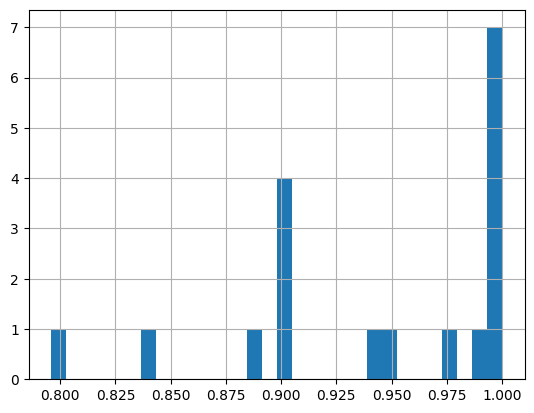

In [40]:
df3.bid2val.hist(bins=30)

<AxesSubplot: >

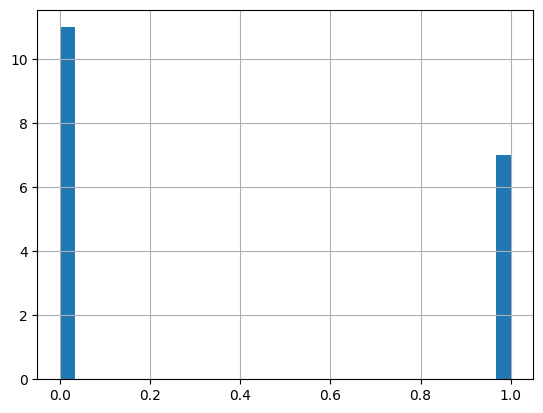

In [41]:
df3.asynchronous.hist(bins=30)

<AxesSubplot: >

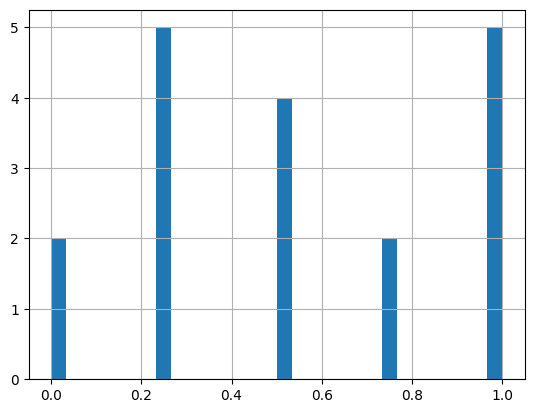

In [42]:
df3.design.hist(bins=30)

<AxesSubplot: >

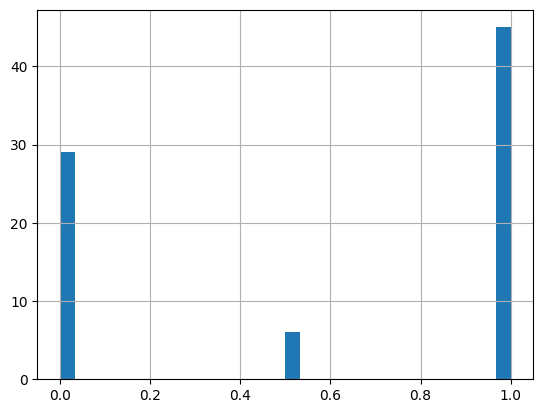

In [106]:
df3.asynchronous.hist(bins=30)

In [113]:
df3.head(20)

,bid2val,episode,Y_std,N,alpha,gamma,egreedy,asynchronous,design,feedback,num_actions
0,0.933333,317000,0.009129,2,0.050,0.99,0,0,0.50,0,16
1,0.933333,296000,0.009334,5,0.050,0.25,0,0,0.75,0,16
2,0.800000,466000,0.063822,7,0.005,0.25,1,0,0.50,1,6
3,0.933333,273000,0.009606,3,0.001,0.75,0,0,1.00,0,16
4,0.950000,273000,0.006386,7,0.010,0.00,0,0,0.25,1,21
5,0.900000,999999,0.118867,6,0.005,0.99,1,1,1.00,1,6
6,0.933333,725000,0.018275,7,0.005,0.50,1,0,0.75,1,16
7,0.800000,413000,0.039033,8,0.005,0.99,0,0,0.75,0,6
8,0.800000,439000,0.060954,2,0.005,0.00,1,0,0.50,0,6
9,0.800000,530000,0.073093,5,0.010,0.75,0,1,0.75,0,6


### Box plots

<AxesSubplot: xlabel='asynchronous', ylabel='bid2val'>

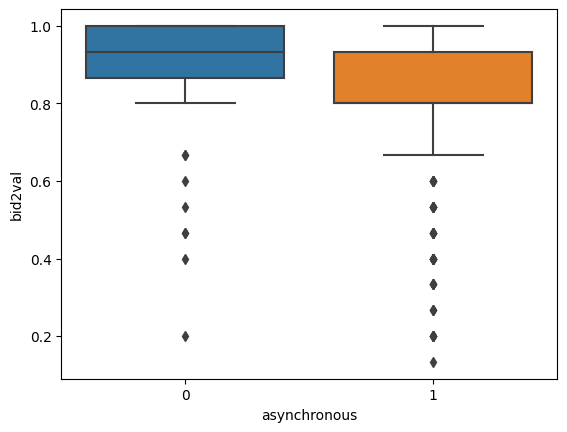

In [57]:
import seaborn as sns
sns.boxplot(data=df3, x="asynchronous", y="bid2val")

<AxesSubplot: xlabel='design', ylabel='bid2val'>

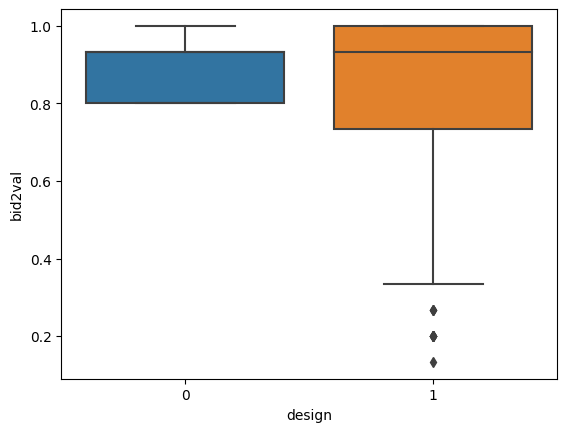

In [58]:
import seaborn as sns
sns.boxplot(data=df3, x="design", y="bid2val")

<AxesSubplot: xlabel='feedback', ylabel='bid2val'>

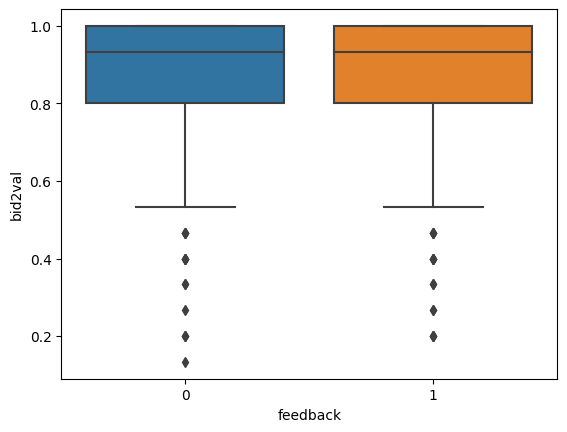

In [59]:
import seaborn as sns
sns.boxplot(data=df3, x="feedback", y="bid2val")

### Regression

In [114]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('bid2val ~ N + alpha + gamma + egreedy + design + asynchronous + feedback + num_actions', data =df3).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                bid2val   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     2.087
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.217
Time:                        14:58:49   Log-Likelihood:                 26.879
No. Observations:                  14   AIC:                            -35.76
Df Residuals:                       5   BIC:                            -30.01
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7876      0.093      8.435   

kurtosistest only valid for n>=20 ... continuing anyway, n=14


### Predictive performance

In [115]:
y = df3['bid2val']
X = df3.drop(['bid2val','counterfactual'],axis=1)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100,max_depth=3)
# Define the number of folds for cross-validation
k_folds = 5
# Perform cross-validation
kf = KFold(n_splits=k_folds, shuffle=True)
cross_val_scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring='r2')
# Print the performance metrics
print("Cross-validation scores:", cross_val_scores)
print("Average R-squared:", cross_val_scores.mean())

KeyError: "['counterfactual'] not found in axis"

### feature importance

In [ ]:
rf_regressor.fit(X, y)
# Get feature importances
importances = rf_regressor.feature_importances_

# Get the indices that would sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature importance ranking
print("Feature Importance Ranking:")
for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature {idx + 1}: {importances[idx]}")

In [54]:
from sklearn.ensemble import RandomForestRegressor
import eli5
from eli5.sklearn import PermutationImportance
rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(X, y)
perm_importance = PermutationImportance(rf_regressor).fit(X, y)
eli5.show_weights(perm_importance)

2023-05-25 11:45:35.143304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Weight,Feature
0.6599 ± 0.1727,x4
0.5920 ± 0.0796,x5
0.5521 ± 0.0518,x0
0.2416 ± 0.0453,x7
0.1632 ± 0.0672,x2
0.1566 ± 0.0182,x6
0.1525 ± 0.0755,x3
0.0986 ± 0.0527,x1


### Propensity Score Treatment Effect

In [65]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

X = df3.drop(['bid2val','asynchronous','counterfactual'],axis=1)
T  = df3['asynchronous']
# Concatenate the treatment indicator and covariates
data = pd.concat([T, X], axis=1)

# Fit a logistic regression model to estimate propensity scores
logit_model = sm.Logit(T, X)
propensity_scores = logit_model.fit().predict(X)

# Estimate the treatment effect using propensity scores
treated_outcomes = y[T == 1]
untreated_outcomes = y[T == 0]

ATE = np.mean(treated_outcomes) - np.mean(untreated_outcomes)

# Print the estimated treatment effect
print("Average Treatment Effect (ATE):", ATE)

Optimization terminated successfully.
         Current function value: 0.689209
         Iterations 4
Average Treatment Effect (ATE): -0.14227335164835175


In [67]:
from econml.dml import LinearDML
est = LinearDML()
est.fit(y, T, X=X,W=X).summary()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
N,0.021,0.007,3.26,0.001,0.008,0.034
alpha,0.159,0.316,0.504,0.614,-0.46,0.778
gamma,0.032,0.029,1.101,0.271,-0.025,0.089
egreedy,-0.04,0.028,-1.424,0.155,-0.096,0.015
design,-0.23,0.025,-9.096,0.0,-0.279,-0.18
feedback,0.008,0.029,0.274,0.784,-0.049,0.065
num_actions,0.0,0.003,0.078,0.938,-0.006,0.006
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,-0.091,0.055,-1.661,0.097,-0.199,0.016


### Mean comparision

In [116]:
df3.groupby('N').mean()

,bid2val,episode,Y_std,alpha,gamma,egreedy,asynchronous,design,feedback,num_actions
N,,,,,,,,,,
2,0.933333,447000.0,0.081396,0.039000,0.310,0.500000,0.25,0.5625,0.25,12.250000
3,0.933333,273000.0,0.009606,0.001000,0.750,0.000000,0.00,1.0000,0.00,16.000000
5,0.866667,413000.0,0.041214,0.030000,0.500,0.000000,0.50,0.7500,0.00,11.000000
6,0.900000,861499.5,0.113741,0.052500,0.945,1.000000,1.00,0.8750,0.50,8.500000
7,0.894444,488000.0,0.029494,0.006667,0.250,0.666667,0.00,0.5000,1.00,14.333333
8,0.900000,452500.0,0.070897,0.027500,0.990,0.500000,0.50,0.3750,0.00,8.500000


In [117]:
df3.groupby('alpha').mean()

,bid2val,episode,Y_std,N,gamma,egreedy,asynchronous,design,feedback,num_actions
alpha,,,,,,,,,,
0.001,0.966667,405000.000000,0.083863,2.5,0.375000,0.000000,0.500000,0.875000,0.0,18.500000
0.005,0.846667,608599.800000,0.060190,6.0,0.546000,0.800000,0.200000,0.700000,0.6,8.000000
0.010,0.875000,401500.000000,0.039739,6.0,0.375000,0.000000,0.500000,0.500000,0.5,13.500000
0.050,0.955556,368333.333333,0.040408,5.0,0.743333,0.333333,0.333333,0.416667,0.0,14.333333
0.100,0.950000,609000.000000,0.102998,4.0,0.575000,1.000000,0.500000,0.625000,0.5,8.500000


In [118]:
df3.groupby('gamma').mean()

,bid2val,episode,Y_std,N,alpha,egreedy,asynchronous,design,feedback,num_actions
gamma,,,,,,,,,,
0.00,0.916667,416333.333333,0.075153,3.666667,0.005333,0.333333,0.333333,0.500000,0.333333,16.000000
0.25,0.911111,419000.000000,0.056846,4.666667,0.051667,0.666667,0.000000,0.583333,0.666667,9.333333
0.50,0.933333,725000.000000,0.018275,7.000000,0.005000,1.000000,0.000000,0.750000,1.000000,16.000000
0.75,0.866667,401500.000000,0.041350,4.000000,0.005500,0.000000,0.500000,0.875000,0.000000,11.000000
0.90,0.900000,723000.000000,0.108616,6.000000,0.100000,1.000000,1.000000,0.750000,0.000000,11.000000
0.99,0.908333,555499.750000,0.067447,6.000000,0.027500,0.500000,0.500000,0.562500,0.250000,9.750000


In [119]:
df3.groupby('egreedy').mean()

,bid2val,episode,Y_std,N,alpha,gamma,asynchronous,design,feedback,num_actions
egreedy,,,,,,,,,,
0,0.907143,377000.000000,0.043529,4.571429,0.018143,0.532857,0.285714,0.678571,0.142857,14.571429
1,0.904762,619999.857143,0.081525,5.428571,0.038571,0.554286,0.428571,0.571429,0.571429,8.857143


In [120]:
df3.groupby('design').mean()

,bid2val,episode,Y_std,N,alpha,gamma,egreedy,asynchronous,feedback,num_actions
design,,,,,,,,,,
0.00,1.000000,492000.000000,0.102760,8.00,0.0500,0.9900,1.000000,1.0,0.000000,11.000000
0.25,0.950000,273000.000000,0.006386,7.00,0.0100,0.0000,0.000000,0.0,1.000000,21.000000
0.50,0.883333,429250.000000,0.057821,3.25,0.0400,0.3725,0.750000,0.0,0.500000,8.500000
0.75,0.894444,537333.333333,0.067745,5.50,0.0285,0.5650,0.333333,0.5,0.166667,12.666667
1.00,0.916667,636499.500000,0.064236,4.50,0.0030,0.8700,0.500000,0.5,0.500000,11.000000


In [121]:
df3.groupby('asynchronous').mean()

,bid2val,episode,Y_std,N,alpha,gamma,egreedy,design,feedback,num_actions
asynchronous,,,,,,,,,,
0,0.898148,410777.777778,0.034880,4.777778,0.025667,0.442222,0.444444,0.611111,0.444444,12.111111
1,0.920000,656399.800000,0.112291,5.400000,0.033200,0.726000,0.600000,0.650000,0.200000,11.000000


In [122]:
df3.groupby('feedback').mean()

,bid2val,episode,Y_std,N,alpha,gamma,egreedy,asynchronous,design,num_actions
feedback,,,,,,,,,,
0,0.900000,446666.666667,0.063405,4.555556,0.030222,0.624444,0.333333,0.444444,0.638889,12.111111
1,0.916667,591799.800000,0.060946,5.800000,0.025000,0.398000,0.800000,0.200000,0.600000,11.000000


In [123]:
df3.groupby('num_actions').mean()

,bid2val,episode,Y_std,N,alpha,gamma,egreedy,asynchronous,design,feedback
num_actions,,,,,,,,,,
6,0.850000,557166.5,0.075525,5.00,0.021667,0.538333,0.666667,0.333333,0.666667,0.50
11,0.950000,607500.0,0.105688,7.00,0.075000,0.945000,1.000000,1.000000,0.375000,0.00
16,0.933333,402750.0,0.011586,4.25,0.026500,0.622500,0.250000,0.000000,0.750000,0.25
21,0.975000,405000.0,0.082253,4.50,0.005500,0.000000,0.000000,0.500000,0.500000,0.50


### t-tests

In [80]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats

In [81]:
summary, results = rp.ttest(group1= df3['bid2val'][df3['design'] == 0], group1_name= "Second Price",
         group2= df3['bid2val'][df3['design'] == 1], group2_name= "First Price")
print(summary)

       Variable      N      Mean        SD        SE  95% Conf.  Interval
0  Second Price  167.0  0.891417  0.075514  0.005843   0.879880  0.902954
1   First Price  207.0  0.808052  0.240369  0.016707   0.775113  0.840990
2      combined  374.0  0.845276  0.190182  0.009834   0.825939  0.864613


The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [83]:
print(results)

                           Independent t-test   results
0  Difference (Second Price - First Price) =     0.0834
1                       Degrees of freedom =   372.0000
2                                        t =     4.3126
3                    Two side test p value =     0.0000
4                   Difference < 0 p value =     1.0000
5                   Difference > 0 p value =     0.0000
6                                Cohen's d =     0.4486
7                                Hedge's g =     0.4477
8                           Glass's delta1 =     1.1040
9                         Point-Biserial r =     0.2182


In [88]:
stats.ttest_ind(df3['bid2val'][df3['design'] == 0],df3['bid2val'][df3['design'] == 1])

Ttest_indResult(statistic=4.312570008065045, pvalue=2.069754534801762e-05)